## KPI SUMMARY

---

### **KPI 1: Average Sales per Day**

- The average daily sales are **$3,125.42**. This serves as a performance benchmark for daily operations.

**Recommendations**:
1. **Set Daily Sales Targets**:  
   - Aim to meet or exceed this benchmark by setting daily goals for staff.
2. **Identify Underperforming Days**:  
   - Monitor days where sales fall below this average and investigate possible reasons (e.g., staffing, weather, or product availability).
3. **Boost Slow Days**:  
   - Introduce promotions, discounts, or loyalty incentives on traditionally slower days (e.g., Mondays and Tuesdays) to increase daily sales.

---

### **KPI 2: Sales Growth Rate (Month-over-Month)**

- Sales growth fluctuates significantly month-to-month. Some months show strong growth (e.g., **March +38.22%**), while others experience declines (e.g., **July -6.40%**).

**Recommendations**:
1. **Seasonal Promotions**:  
   - Plan special promotions or events during historically slower months (**January, July**) to stimulate sales.
2. **Analyze Successful Months**:  
   - Identify what drives growth during high-performing months (e.g., marketing campaigns, holidays) and replicate these strategies.
3. **Inventory Planning**:  
   - Align inventory and staffing with growth trends to meet customer demand efficiently and avoid overstocking or understaffing.

---

### **KPI 3: Holiday Sales vs. Non-Holiday Sales Percentage**

- **Holiday Sales** account for **36.75%** of total sales, while **Non-Holiday Sales** make up **63.25%**.  
- Sales are significantly higher on non-holiday days compared to holidays.

**Recommendations**:
1. **Pre-Holiday Promotions**:  
   - Launch promotions leading up to holidays to capture sales before potential holiday dips.
2. **Post-Holiday Deals**:  
   - Offer post-holiday discounts to boost sales two days after holidays when sales tend to rebound.
3. **Holiday-Specific Strategies**:  
   - Enhance marketing efforts for holidays with historically low sales by introducing themed products, special menus, or limited-time offers.

---

### **KPI 4: Temperature Impact on Net Sales**

- Sales are highest on **Hot** days (26.25%) and **Cool** days (25.48%).  
- **Cold** days have the lowest sales (23.35%).

**Recommendations**:
1. **Weather-Specific Promotions**:  
   - On **Hot Days**: Promote cold beverages, ice cream, and light snacks.  
   - On **Cold Days**: Focus on warm drinks, soups, and comfort foods.
2. **Seasonal Menus**:  
   - Introduce a **seasonal menu** that aligns with temperature trends to attract more customers.
3. **Delivery Options**:  
   - Offer delivery services or online ordering during **Cold Days** when customers are less likely to visit in person.
4. **Marketing Strategy**:  
   - Adjust marketing messages to align with the weather (e.g., "Cool Off with a Cold Drink" during hot days or "Warm Up with Freshly Baked Goods" during cold days).

---

These recommendations will help Veronica's bakery **increase sales**, **optimize marketing strategies**, and **better serve customers** under different conditions.


In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [3]:
# Load the config.yaml file
with open("../config.yaml", "r") as file:
    config = yaml.safe_load(file)

In [4]:
# Get the path to the clean data
clean_data_path = config['output_data']['cleaned_merged_climate_sales']

# Load the clean data
df = pd.read_csv(clean_data_path)

# Inspect the data
print(df.head())

         date        day  gross_sales  returns  discounts_comps  net_sales  \
0  2023-02-01  Wednesday       919.07      0.0           -33.35     885.72   
1  2023-02-02   Thursday      1463.52      0.0           -20.61    1442.91   
2  2023-02-03     Friday      1051.04      0.0            -9.60    1041.44   
3  2023-02-04   Saturday      2243.72      0.0           -12.43    2231.29   
4  2023-02-05     Sunday      1405.99      0.0           -25.12    1380.87   

   gift_card_sales     tax     tip  refunds_by_amount  ...  total_precip_mm  \
0              0.0   84.44   42.35                0.0  ...              0.0   
1              0.0  108.76   72.70                0.0  ...              0.0   
2              0.0   93.65   49.94                0.0  ...              0.3   
3              0.0  176.67  186.98                0.0  ...              0.0   
4              0.0   85.04   77.20                0.0  ...              0.0   

   total_snow_mm  holiday_name  is_holiday  is_holiday_p

In [13]:
df['temp_category'].unique()

array(['Cold', 'Cool', 'Hot', 'Comfortable'], dtype=object)

In [8]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
# KPI 1: Average Sales per Day
average_sales_per_day = df['net_sales'].sum() / df['date'].nunique()
average_sales_per_day

np.float64(3125.4240358744396)

In [9]:
# KPI 2: Sales Growth Rate (Month-over-Month)
# Extract year and month from the date
df['year_month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['net_sales'].sum()

# Calculate month-over-month growth rate
sales_growth_rate = monthly_sales.pct_change().dropna() * 100

In [11]:
sales_growth_rate

year_month
2023-03    38.224901
2023-04    13.485477
2023-05     4.608056
2023-06     6.279414
2023-07    -6.396030
2023-08     2.735831
2023-09    10.982153
2023-10    10.981841
2023-11    12.046280
2023-12    12.258027
2024-01   -17.036803
2024-02     4.873259
2024-03    16.997639
2024-04    -2.231853
2024-05    16.093028
2024-06    -9.050385
2024-07    -9.287236
2024-08     1.518418
2024-09    -1.138714
2024-10    -1.492378
2024-11     3.184332
Freq: M, Name: net_sales, dtype: float64

In [10]:
monthly_sales 

year_month
2023-02     44190.20
2023-03     61081.86
2023-04     69319.04
2023-05     72513.30
2023-06     77066.71
2023-07     72137.50
2023-08     74111.06
2023-09     82250.05
2023-10     91282.62
2023-11    102278.78
2023-12    114816.14
2024-01     95255.14
2024-02     99897.17
2024-03    116877.33
2024-04    114268.80
2024-05    132658.11
2024-06    120652.04
2024-07    109446.80
2024-08    111108.66
2024-09    109843.45
2024-10    108204.17
2024-11    111649.75
Freq: M, Name: net_sales, dtype: float64

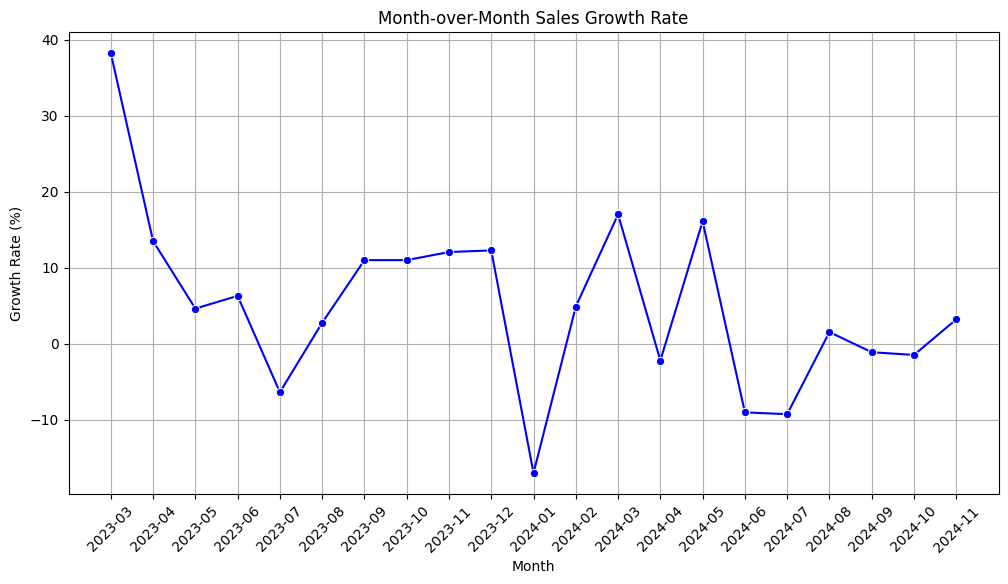

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_6928/3357115917.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month', y='net_sales', data=monthly_sales_growth, palette='viridis')


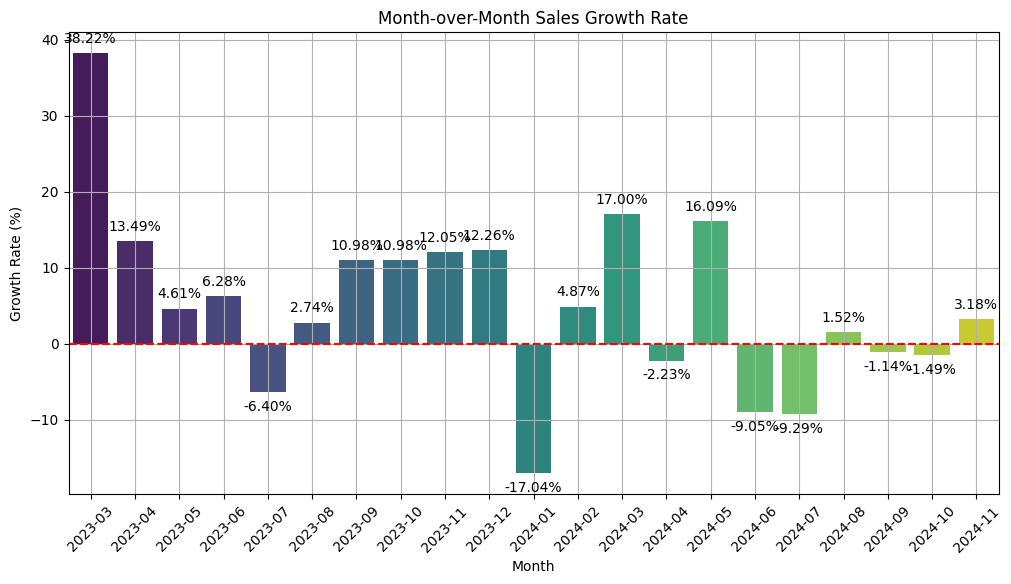

In [20]:
# Convert year_month to string for plotting
monthly_sales_growth = sales_growth_rate.reset_index()
monthly_sales_growth['year_month'] = monthly_sales_growth['year_month'].astype(str)

# 1. Line Plot with Markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='net_sales', data=monthly_sales_growth, marker='o', color='blue')
plt.title('Month-over-Month Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

# 2. Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='net_sales', data=monthly_sales_growth, palette='viridis')
plt.title('Month-over-Month Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='red', linestyle='--')

# Add data labels
for i, value in enumerate(monthly_sales_growth['net_sales']):
    plt.text(i, value + (1 if value > 0 else -1), f'{value:.2f}%', ha='center', va='bottom' if value > 0 else 'top', fontsize=10)

plt.grid(True)
plt.show()

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_6928/2372450601.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Percentage', data=holiday_sales_data, palette='viridis')


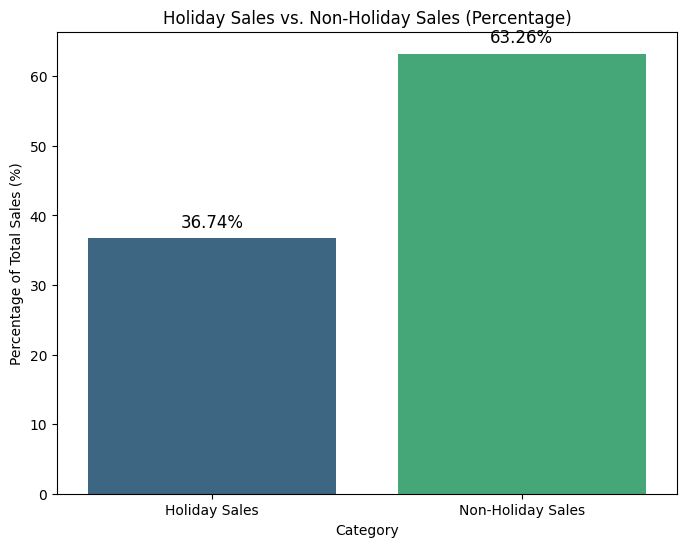

In [23]:
# KPI 3: Holiday Sales vs. Non-Holiday Sales Percentage
holiday_sales = df[df['is_holiday'] == 1]['net_sales'].mean()
non_holiday_sales = df[df['is_holiday'] == 0]['net_sales'].mean()

# Calculate holiday and non-holiday sales percentages
total_sales = holiday_sales + non_holiday_sales
holiday_sales_percentage = (holiday_sales / total_sales) * 100
non_holiday_sales_percentage = (non_holiday_sales / total_sales) * 100

# Create a DataFrame for visualization
holiday_sales_data = pd.DataFrame({
    'Category': ['Holiday Sales', 'Non-Holiday Sales'],
    'Percentage': [holiday_sales_percentage, non_holiday_sales_percentage]
})

# Plot the percentages using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Percentage', data=holiday_sales_data, palette='viridis')

# Add annotations to the bars
for i, value in enumerate(holiday_sales_data['Percentage']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Holiday Sales vs. Non-Holiday Sales (Percentage)')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Sales (%)')

# Display the plot
plt.show()

In [31]:
#KPI 4: Temperature Impact on Net Sales
# Calculate the average net sales for each temperature category
temperature_impact_average_sales = df.groupby('temp_category')['net_sales'].mean().sort_index()

# Display the calculated averages for each temperature category
temperature_impact_average_sales



temp_category
Cold           2956.047952
Comfortable    3155.237004
Cool           3226.705250
Hot            3323.783871
Name: net_sales, dtype: float64

In [32]:
# Calculate the total average net sales across all temperature categories
total_average_sales = temperature_impact_average_sales.sum()

# Calculate the percentage contribution of each temperature category to the total average sales
temperature_impact_average_sales_percentage = (temperature_impact_average_sales / total_average_sales) * 100

# Display the percentage contribution for each temperature category
temperature_impact_average_sales_percentage


temp_category
Cold           23.346238
Comfortable    24.919391
Cool           25.483832
Hot            26.250538
Name: net_sales, dtype: float64

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_6928/3689342615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temperature_impact_percentage.index, y=temperature_impact_percentage.values, palette='coolwarm')


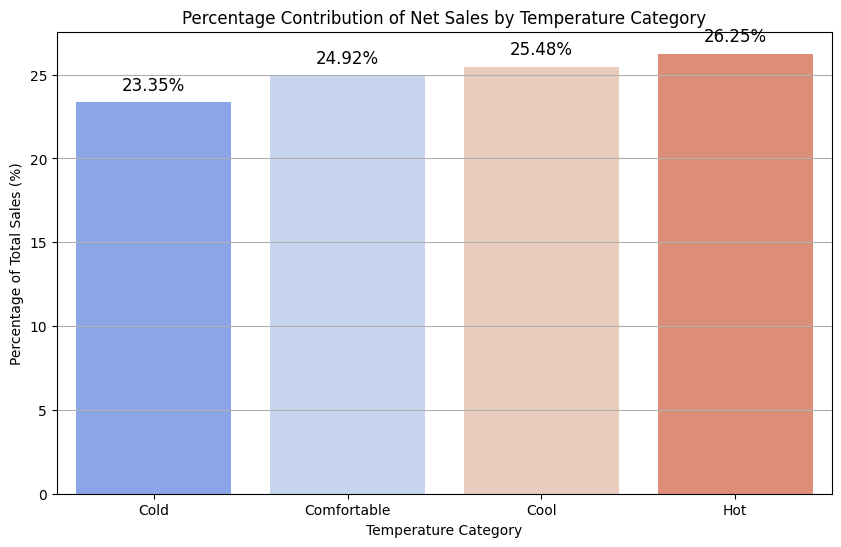

In [26]:
# Plot the percentage contribution of net sales by temperature category
plt.figure(figsize=(10, 6))
sns.barplot(x=temperature_impact_percentage.index, y=temperature_impact_percentage.values, palette='coolwarm')

# Add annotations to each bar
for i, value in enumerate(temperature_impact_percentage.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Percentage Contribution of Net Sales by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Percentage of Total Sales (%)')
plt.grid(axis='y')

# Display the plot
plt.show()
